<a href="https://colab.research.google.com/github/G-Conard/ds595-final-project/blob/main/LSTM_Heat_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
132/132 [==============================] - 55s 388ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 2/20
132/132 [==============================] - 39s 298ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 3/20
132/132 [==============================] - 40s 305ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 4/20
132/132 [==============================] - 39s 297ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 5/20
132/132 [==============================] - 48s 362ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 6/20
132/132 [==============================] - 38s 289ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/20
132/132 [==============================] - 39s 292ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8/20
132/132 [==============================] - 4

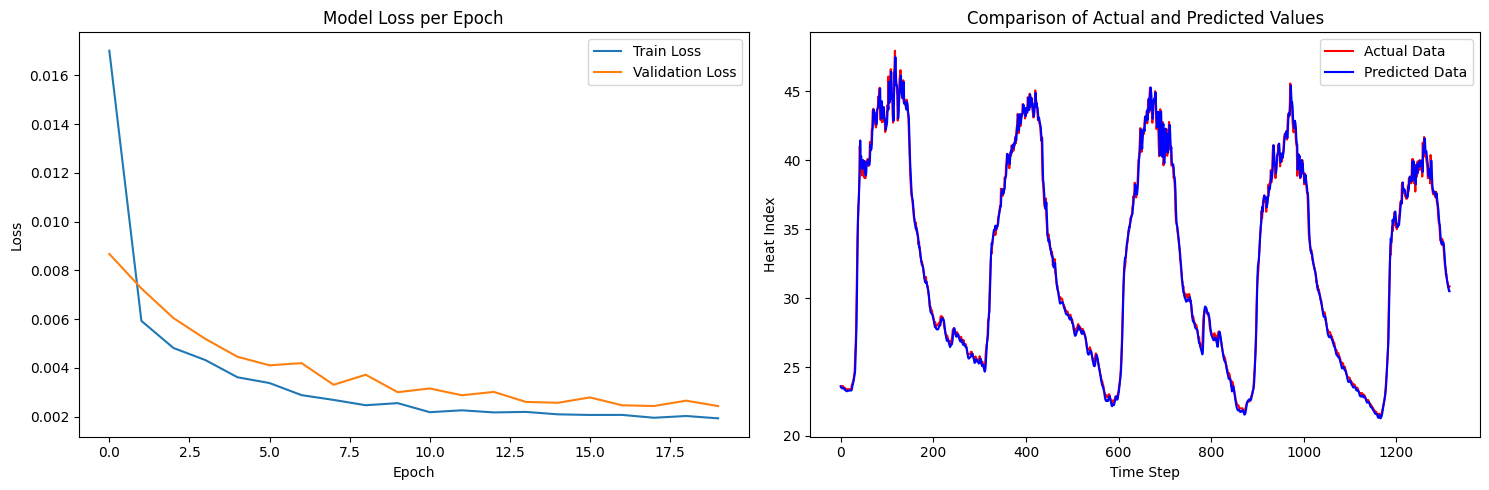

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load and prepare data
data = pd.read_csv('/content/weather_stations_data.csv')
data = data.dropna()
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data = data[['heat_index']].values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
sc = scaler.fit_transform(data)

# Define timestep for the model
timestep = 288
X, Y = [], []
for i in range(len(sc) - timestep):
    X.append(sc[i:(i + timestep)])
    Y.append(sc[i + timestep])
X, Y = np.array(X), np.array(Y)
X = X[:, :, None]  # Reshape for LSTM [samples, time steps, features]

# Split the data into training and test sets
split_idx = int(0.8 * len(X))
X_train, Y_train = X[:split_idx], Y[:split_idx]
X_test, Y_test = X[split_idx:], Y[split_idx:]

# Build the model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(timestep, 1), return_sequences=True),
    Dropout(0.1),
    LSTM(64, activation='tanh', return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(X_test, Y_test, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)

# Plot the training and validation loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Predict using the model
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Inverse transform to original scale
Y_test_rescaled = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Also inverse transform actual data

# Plotting the results of predictions
plt.subplot(1, 2, 2)
plt.plot(Y_test_rescaled, label='Actual Data', color='red')
plt.plot(predicted, label='Predicted Data', color='blue')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Heat Index')
plt.legend()

plt.tight_layout()
plt.show()


289/289 [==============================] - 24s 83ms/step


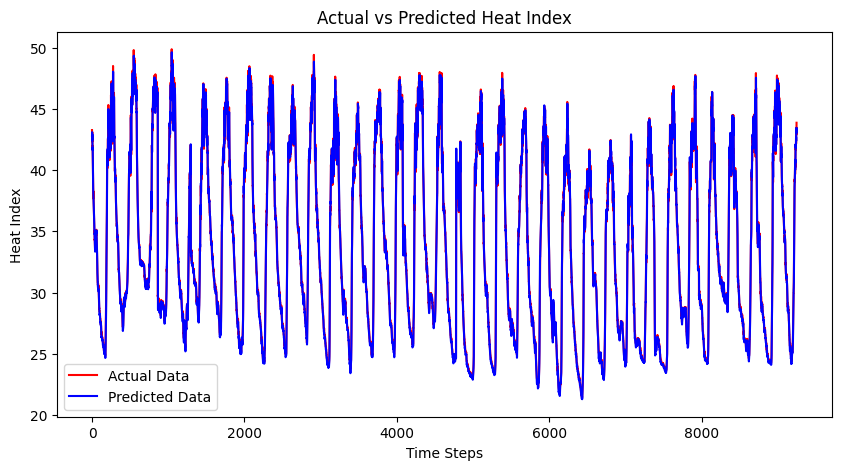

Test Loss: [0.001562868244946003, 0.001562868244946003]
Test MSE: 0.0015628688


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanSquaredError

# Load and prepare data (example data loading)
data = pd.read_csv('/content/weather_stations_data NEW.csv')
data = data.dropna()
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data = data[['heat_index']].values.astype('float32')

# Assume scaler and model are already defined and trained
# Preprocess the new dataset similarly to how the training data was processed
new_data_scaled = scaler.transform(data)

# Assuming 'timestep' is defined as in your model training
X_new = []
Y_new = []
for i in range(len(new_data_scaled) - timestep):
    X_new.append(new_data_scaled[i:(i + timestep)])
    Y_new.append(new_data_scaled[i + timestep])
X_new = np.array(X_new)
Y_new = np.array(Y_new)
X_new = X_new[:, :, None]  # Reshape for LSTM if needed

# Predict using the model
predictions = model.predict(X_new)
predictions_rescaled = scaler.inverse_transform(predictions)  # Rescale if necessary

# Plotting actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(Y_new.reshape(-1, 1)), label='Actual Data', color='red')  # Y_new contains the actual targets
plt.plot(predictions_rescaled, label='Predicted Data', color='blue')
plt.title('Actual vs Predicted Heat Index')
plt.xlabel('Time Steps')
plt.ylabel('Heat Index')
plt.legend()
plt.show()

# Evaluating the model on the new data for MSE
mse_metric = MeanSquaredError()
mse_metric.update_state(Y_new, predictions)
mse_value = mse_metric.result().numpy()

# You can also evaluate the loss if it is different from MSE
test_loss = model.evaluate(X_new, Y_new, verbose=0)

print("Test Loss:", test_loss)
print("Test MSE:", mse_value)
